# Продуктовый аналз стартапа в e-commerce

Есть стартап, который создает новый маркетплейс. Он недавно появился на рынке и занимается продажей новых товаров из Бразилии, которые только начинают поступать в продажу.

In [1]:
#импорт библиотек
import pandas as pd
from operator import attrgetter
import seaborn as sns
from matplotlib import pyplot as plt
from matplotlib import colors as mcolors
import numpy as np


In [2]:
customers = pd.read_csv('olist_customers_dataset.csv')
orders = pd.read_csv('olist_orders_dataset.csv')
order_items = pd.read_csv('olist_order_items_dataset.csv')

In [3]:
'''olist_customers_dataset.csv — таблица с уникальными идентификаторами пользователей
customer_id — позаказный идентификатор пользователя
customer_unique_id — уникальный идентификатор пользователя (аналог номера паспорта)
customer_zip_code_prefix — почтовый индекс пользователя
customer_city — город доставки пользователя
customer_state — штат доставки пользователя'''

customers.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [4]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


In [5]:
'''olist_orders_dataset.csv —  таблица заказов
order_id — уникальный идентификатор заказа (номер чека)
customer_id — позаказный идентификатор пользователя
order_status — статус заказа
order_purchase_timestamp — время создания заказа
order_approved_at — время подтверждения оплаты заказа
order_delivered_carrier_date — время передачи заказа в логистическую службу
order_delivered_customer_date — время доставки заказа
order_estimated_delivery_date — обещанная дата доставки

Уникальные статусы заказов в таблице olist_orders_dataset:

created — создан; approved — подтверждён; invoiced — выставлен счёт; processing — в процессе сборки заказа;
shipped — отгружён со склада; delivered — доставлен пользователю; unavailable — заказ отменён по причине недоступности товара;;
canceled — отменён'''

orders.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [6]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


In [7]:
'''olist_order_items_dataset.csv — товарные позиции, входящие в заказы
order_id — уникальный идентификатор заказа (номер чека)
order_item_id — идентификатор товара внутри одного заказа
product_id — ид товара (аналог штрихкода)
seller_id — ид производителя товара
shipping_limit_date — максимальная дата доставки продавцом для передачи заказа партнеру по логистике
price — цена за единицу товара
freight_value — вес товара'''

order_items.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [8]:
order_items.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


## 1. Оценим месячный retention в оформление заказа с помощью когортного анализа
Важно, чтобы клиенты возвращались в маркетплейс для совершения больших покупок

#### Посмотрим на данные и определим, какие статусы заказа будем учитывать для рачета retention

In [17]:
#создаем копию всех df, чтобы не вносить изменения в основные df

customers_copy = customers.copy()
orders_copy = orders.copy()
order_items_copy = order_items.copy()

In [18]:
#переводим в тип даты все df

orders_copy['order_purchase_timestamp'] = pd.to_datetime(orders_copy.order_purchase_timestamp)
orders_copy['order_approved_at'] = pd.to_datetime(orders_copy.order_approved_at)
orders_copy['order_delivered_carrier_date'] = pd.to_datetime(orders_copy.order_delivered_carrier_date)
orders_copy['order_delivered_customer_date'] = pd.to_datetime(orders_copy.order_delivered_customer_date)
orders_copy['order_estimated_delivery_date'] = pd.to_datetime(orders_copy.order_estimated_delivery_date)
order_items_copy['shipping_limit_date'] = pd.to_datetime(order_items_copy.shipping_limit_date)

In [23]:
#объединим df

orders_customers = pd.merge(orders_copy, customers_copy, on='customer_id')

In [29]:
orders.groupby('order_status').order_id.nunique()

order_status
approved           2
canceled         625
created            5
delivered      96478
invoiced         314
processing       301
shipped         1107
unavailable      609
Name: order_id, dtype: int64

#### Заказы со статусом delivered будем учитывать в retention (96478)

In [30]:
#оставляем только необходимые на этом этапе столбцы

orders_cust_del = orders_customers.query('order_status == "delivered"')[['order_id', 'customer_unique_id', 'order_purchase_timestamp']]


In [31]:
# Извлекаем месяц и день заказа
orders_cust_del['order_period'] = orders_cust_del['order_purchase_timestamp'].dt.to_period('M')
orders_cust_del['order_period_day'] = orders_cust_del['order_purchase_timestamp'].dt.to_period('D')

In [32]:
#Присваиваем когорты на основе даты первого действия для каждого пользователя

orders_cust_del['cohort'] = orders_cust_del.groupby('customer_unique_id')['order_purchase_timestamp'].transform('min').dt.to_period('M')
orders_cust_del['cohort_day'] = orders_cust_del.groupby('customer_unique_id')['order_purchase_timestamp'].transform('min').dt.to_period('D')

In [33]:
# Рассчитываем номер периода в днях (месячные периоды, деля на 30)
orders_cust_del['period_number_month'] = np.floor((orders_cust_del.order_period_day - orders_cust_del.cohort_day).apply(attrgetter('n')) / 30)


In [34]:
# Агрегируем данные по когортам и рассчитанному номеру периода (в месяцах)
df_cohort = orders_cust_del.groupby(['cohort', 'period_number_month']) \
                     .agg(n_customers=('customer_unique_id', 'nunique')) \
                     .reset_index()

df_cohort.head()

,cohort,period_number_month,n_customers
0,2016-09,0.0,1
1,2016-10,0.0,262
2,2016-10,6.0,1
3,2016-10,9.0,1
4,2016-10,11.0,1


In [37]:
# Создаем сводную таблицу для когортного анализа
cohort_pivot = df_cohort.pivot_table(index='cohort', columns='period_number_month', values='n_customers')
cohort_pivot

period_number_month,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,...,11.0,12.0,13.0,14.0,15.0,16.0,17.0,19.0,20.0,21.0
cohort,,,,,,,,,,,,,,,,,,,,,
2016-09,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-10,262.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,1.0,...,1.0,NaN,1.0,NaN,1.0,NaN,1.0,2.0,1.0,1.0
2016-12,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-01,717.0,2.0,NaN,4.0,1.0,1.0,2.0,2.0,NaN,NaN,...,4.0,3.0,2.0,NaN,2.0,2.0,2.0,1.0,NaN,NaN
2017-02,1628.0,2.0,3.0,6.0,4.0,2.0,4.0,1.0,2.0,4.0,...,6.0,1.0,3.0,2.0,1.0,1.0,3.0,NaN,NaN,NaN
2017-03,2503.0,7.0,13.0,11.0,3.0,2.0,9.0,4.0,6.0,6.0,...,4.0,4.0,3.0,7.0,2.0,3.0,2.0,NaN,NaN,NaN
2017-04,2256.0,8.0,6.0,1.0,6.0,8.0,6.0,10.0,5.0,6.0,...,3.0,NaN,2.0,2.0,2.0,2.0,NaN,NaN,NaN,NaN
2017-05,3451.0,14.0,14.0,8.0,13.0,11.0,11.0,4.0,10.0,9.0,...,11.0,6.0,3.0,7.0,4.0,NaN,NaN,NaN,NaN,NaN
2017-06,3037.0,13.0,15.0,11.0,5.0,16.0,9.0,6.0,4.0,10.0,...,9.0,3.0,9.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN


In [38]:
# Рассчитываем размеры когорт (первый столбец сводной таблицы)
cohort_size = cohort_pivot.iloc[:, 0]
cohort_size

cohort
2016-09       1.0
2016-10     262.0
2016-12       1.0
2017-01     717.0
2017-02    1628.0
2017-03    2503.0
2017-04    2256.0
2017-05    3451.0
2017-06    3037.0
2017-07    3752.0
2017-08    4057.0
2017-09    4004.0
2017-10    4328.0
2017-11    7060.0
2017-12    5338.0
2018-01    6842.0
2018-02    6288.0
2018-03    6774.0
2018-04    6582.0
2018-05    6506.0
2018-06    5878.0
2018-07    5949.0
2018-08    6144.0
Freq: M, Name: 0.0, dtype: float64

In [40]:
# Вычисляем коэффициенты удержания, деля на размер когорты
retention_matrix = cohort_pivot.divide(cohort_size, axis=0)
retention_matrix

period_number_month,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,...,11.0,12.0,13.0,14.0,15.0,16.0,17.0,19.0,20.0,21.0
cohort,,,,,,,,,,,,,,,,,,,,,
2016-09,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-10,1.0,NaN,NaN,NaN,NaN,NaN,0.003817,NaN,NaN,0.003817,...,0.003817,NaN,0.003817,NaN,0.003817,NaN,0.003817,0.007634,0.003817,0.003817
2016-12,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-01,1.0,0.002789,NaN,0.005579,0.001395,0.001395,0.002789,0.002789,NaN,NaN,...,0.005579,0.004184,0.002789,NaN,0.002789,0.002789,0.002789,0.001395,NaN,NaN
2017-02,1.0,0.001229,0.001843,0.003686,0.002457,0.001229,0.002457,0.000614,0.001229,0.002457,...,0.003686,0.000614,0.001843,0.001229,0.000614,0.000614,0.001843,NaN,NaN,NaN
2017-03,1.0,0.002797,0.005194,0.004395,0.001199,0.000799,0.003596,0.001598,0.002397,0.002397,...,0.001598,0.001598,0.001199,0.002797,0.000799,0.001199,0.000799,NaN,NaN,NaN
2017-04,1.0,0.003546,0.002660,0.000443,0.002660,0.003546,0.002660,0.004433,0.002216,0.002660,...,0.001330,NaN,0.000887,0.000887,0.000887,0.000887,NaN,NaN,NaN,NaN
2017-05,1.0,0.004057,0.004057,0.002318,0.003767,0.003187,0.003187,0.001159,0.002898,0.002608,...,0.003187,0.001739,0.000869,0.002028,0.001159,NaN,NaN,NaN,NaN,NaN
2017-06,1.0,0.004281,0.004939,0.003622,0.001646,0.005268,0.002963,0.001976,0.001317,0.003293,...,0.002963,0.000988,0.002963,0.001317,NaN,NaN,NaN,NaN,NaN,NaN


#### Расчитаем усредненный retention за 1-ый месяц по всем кагортам

In [42]:
# медианный retention 1-го месяца

matrix_median = retention_matrix[1.0].median()
print(f'Медианный retention за первый месяц: {matrix_median:.4f}')

Медианный retention за первый месяц: 0.0035


In [44]:
#когортa с самым высоким retention на 3-й месяц.
matrix_max_mounth = retention_matrix[3.0].idxmax()
matrix_max = retention_matrix[3.0].max()
print(f'Когорта третьего месяца с самым высоким retention: {matrix_max_mounth}, значение: {matrix_max:.4f}%')

Когорта третьего месяца с самым высоким retention: 2017-01, значение: 0.0056%


#### Строим тепловую карту когортного анализа

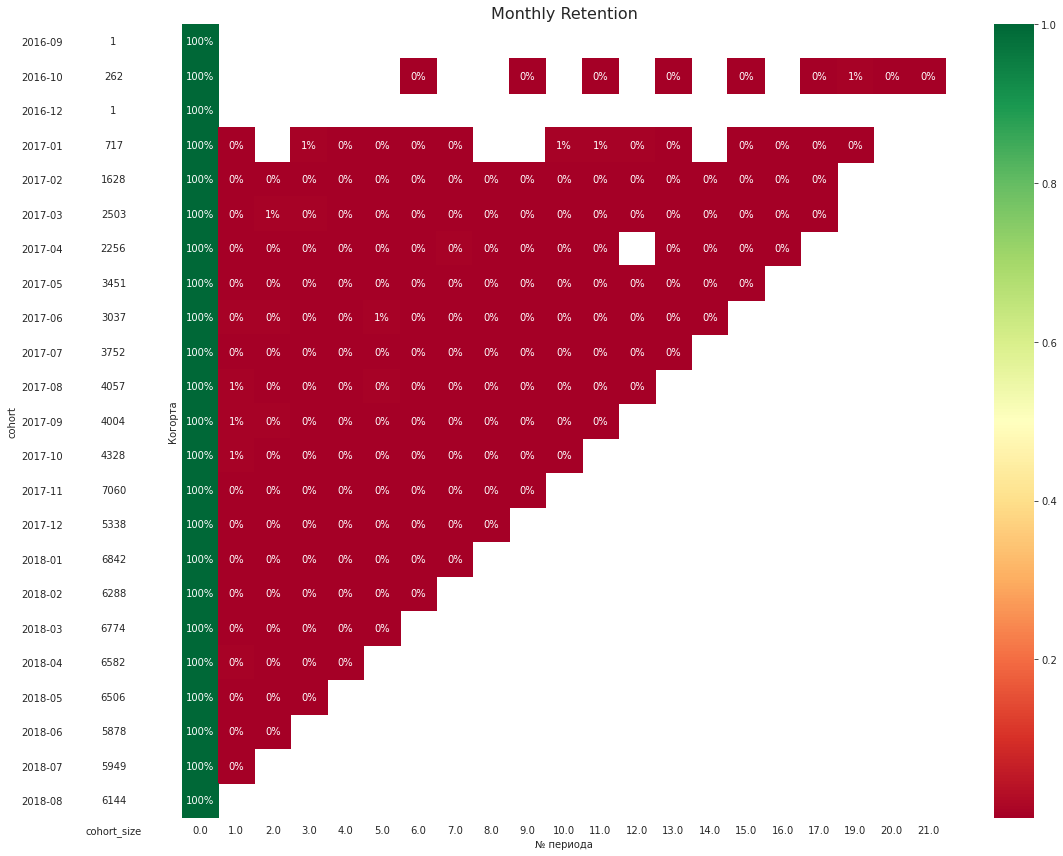

In [45]:
with sns.axes_style("white"):
    fig, ax = plt.subplots(1, 2, figsize=(16, 12), sharey=True, gridspec_kw={'width_ratios': [1, 11]})

    # Тепловая карта для коэффициентов удержания
    sns.heatmap(retention_matrix,
                mask=retention_matrix.isnull(),
                annot=True,
                fmt='.0%',
                cmap='RdYlGn',
                ax=ax[1])
    ax[1].set_title('Monthly Retention', fontsize=16)
    ax[1].set(xlabel='№ периода', ylabel='Когорта')

    # Тепловая карта для размеров когорт
    cohort_size_df = pd.DataFrame(cohort_size).rename(columns={0: 'cohort_size'})
    white_cmap = mcolors.ListedColormap(['white'])
    sns.heatmap(cohort_size_df,
                annot=True,
                cbar=False,
                fmt='g',
                cmap=white_cmap,
                ax=ax[0])

    fig.tight_layout()
    plt.show()

# 2. Определим, существует ли product/market fit у маркетплейса.
Ведь до сих пор непонятно, можно ли масштабировать подобный продукт на новые рынки. Есть вероятность, что маркетплейс будет приносить убытки.

#### PMF у маркетплейса слабый, масштабировать пока нельзя. 

- По тепловой карте можем понять, что только в месяце 1 с августа по октябрь 2017 года вернулся лишь по 0,3% (медиана) клиентов, а на втором и последующих месяцах (0,0%). Клиенты сильно от нас уходят, ценности для клиента в продукте нет. 

- Но количество клиентов из месяца в месяц растет, то есть проблем с привлечением новых клиентов нет. Однако, важнопонимать, остаются ли они с нами. Исходя из анализа, этого нет.

- Нужно провести иследование ЦА для понимания их потребности и улучшения продукта (ассортимент, удобство поиска, оформления, оплаты товаров на самом маркетплейсе). Разработать минимально жизнеспособный продукт. Получить обратную связь (насколько клиенты удовлетворены предлагаемой продукцией на маркетплейсе)


## 3. Сформулируем продуктовые метрики маркетплейса, чтобы компания могла на них ориентироваться, чтобы максимизировать прибыль компании

Первая метрика должна отражать рост объёма продаж маркетплейса.
Вторая — показывать объем аудитории, которой продукт доставляет ценность.
Третья — отражать заинтересованность новых клиентов в продукте.
Четвёртая — отражать вовлеченность клиента в продолжение использования продукта.
Пятая — отражать денежное выражение вовлеченности клиента.
Визуализируйте первую, вторую, четвёртую и пятую метрики. Используйте месячную гранулярность и окно в 1 месяц, если это нужно.

#### 1. Метрика - **Рост объёма продаж (GMV)**. Показывает общим объем продаж за определенный период. Показывает насколько успешно маркетплейс привлекает клиентов и получает доход

In [73]:
#объединяем таблицы (добавляем price)
df_for_gmv = orders_cust_del.merge(order_items_copy[['order_id','price']], on='order_id')

In [74]:
#рассчитываем GMV
gmv = df_for_gmv.groupby('order_period', as_index=False) \
          .agg(gmv=('price', 'sum'))

In [76]:
# Преобразование типа данных:
gmv['order_period'] = gmv['order_period'].astype(str)

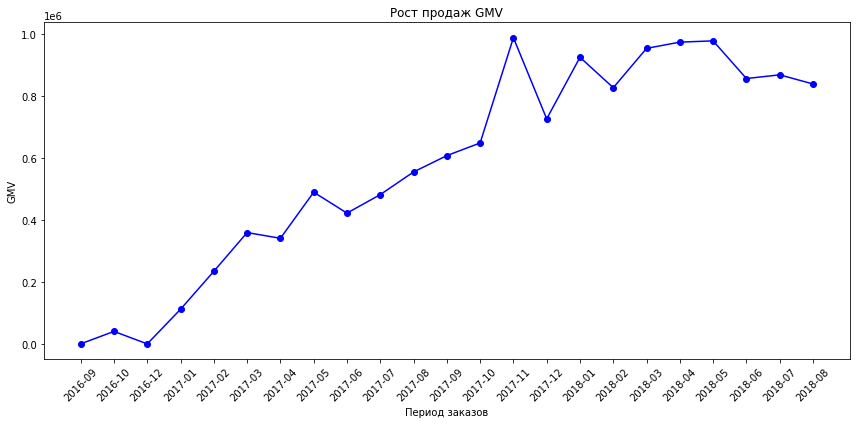

In [61]:
#визуализация GMV
plt.figure(figsize=(12, 6))
plt.plot(gmv['order_period'], gmv['gmv'], marker='o', linestyle='-', color='b')


plt.title('Рост продаж GMV')
plt.xlabel('Период заказов')
plt.ylabel('GMV')
plt.xticks(rotation=45)  
plt.tight_layout()
plt.show()

В динамике видим рост, а также стагнацию последние 3 месяца

#### 2. Выберем метрику, которая показывает объем аудитории, которой продукт доставляет ценность
Метрика - MAU (Monthly Active Users)


In [85]:
for_mau = orders_customers[['order_id', 'customer_unique_id', 'order_purchase_timestamp']]
for_mau['order_period'] = for_mau['order_purchase_timestamp'].dt.to_period('M')

/opt/tljh/user/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [88]:
mau = for_mau.groupby('order_period') \
              .agg({'customer_unique_id': 'nunique'}) \
              .rename(columns={'customer_unique_id': 'active_users'}) \
              .reset_index()
mau['order_period'] = mau['order_period'].astype(str)


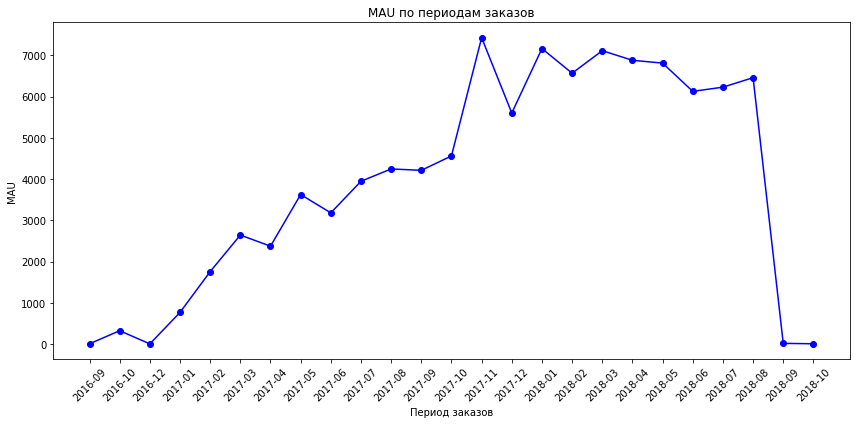

In [90]:
#визуализация MAU

plt.figure(figsize=(12, 6))
plt.plot(mau['order_period'], mau['active_users'], marker='o', linestyle='-', color='b')


plt.title('MAU по периодам заказов')
plt.xlabel('Период заказов')
plt.ylabel('MAU')
plt.xticks(rotation=45)  
plt.tight_layout()
plt.show()

#### 3. Заинтересованность новых клиентов в продукте — Conversion Rate (CR - Конверсия в первую покупку)
- Вычисляется как (Число новых пользователей, совершивших покупку / Всего новых пользователей) × 100%   
- Эта метрика измеряет процент новых пользователей, которые совершают покупку после первого визита на сайт или в приложение. Она отражает, насколько эффективно маркетплейс привлекает и конвертирует новых клиентов.

#### 4. Вовлеченность клиента в продолжение использования продукта

Метрика - Retention Rate (Удержание). Показывает процент клиентов, которые после первой покупки приходят снова.

In [91]:
retention_matrix

period_number_month,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,...,11.0,12.0,13.0,14.0,15.0,16.0,17.0,19.0,20.0,21.0
cohort,,,,,,,,,,,,,,,,,,,,,
2016-09,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-10,1.0,NaN,NaN,NaN,NaN,NaN,0.003817,NaN,NaN,0.003817,...,0.003817,NaN,0.003817,NaN,0.003817,NaN,0.003817,0.007634,0.003817,0.003817
2016-12,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-01,1.0,0.002789,NaN,0.005579,0.001395,0.001395,0.002789,0.002789,NaN,NaN,...,0.005579,0.004184,0.002789,NaN,0.002789,0.002789,0.002789,0.001395,NaN,NaN
2017-02,1.0,0.001229,0.001843,0.003686,0.002457,0.001229,0.002457,0.000614,0.001229,0.002457,...,0.003686,0.000614,0.001843,0.001229,0.000614,0.000614,0.001843,NaN,NaN,NaN
2017-03,1.0,0.002797,0.005194,0.004395,0.001199,0.000799,0.003596,0.001598,0.002397,0.002397,...,0.001598,0.001598,0.001199,0.002797,0.000799,0.001199,0.000799,NaN,NaN,NaN
2017-04,1.0,0.003546,0.002660,0.000443,0.002660,0.003546,0.002660,0.004433,0.002216,0.002660,...,0.001330,NaN,0.000887,0.000887,0.000887,0.000887,NaN,NaN,NaN,NaN
2017-05,1.0,0.004057,0.004057,0.002318,0.003767,0.003187,0.003187,0.001159,0.002898,0.002608,...,0.003187,0.001739,0.000869,0.002028,0.001159,NaN,NaN,NaN,NaN,NaN
2017-06,1.0,0.004281,0.004939,0.003622,0.001646,0.005268,0.002963,0.001976,0.001317,0.003293,...,0.002963,0.000988,0.002963,0.001317,NaN,NaN,NaN,NaN,NaN,NaN


#### 5. Денежное выражение вовлеченности клиента
- Метрика (ARPPU) = Общая выручка за период / Количество пользователей, совершивших покупку
- Отражает выручку, полученную с одного клиента

In [98]:
#считаем кол-во уникальных пользователей совершивших покупку
paying_cust = orders_cust_del.groupby('order_period') \
                .agg({'customer_unique_id': 'nunique'}) \
                .rename(columns={'customer_unique_id': 'active_users'}) \
                .reset_index()
paying_cust['order_period'] = paying_cust['order_period'].astype(str)

In [102]:
#gmv == объем продаж ранее посчитали, объединяем с предыд. df
arppu = gmv.merge(paying_cust,  on='order_period')

arppu['arppu'] = (arppu['gmv'] / arppu['active_users']).round(2) 
arppu

,order_period,gmv,active_users,arppu
0,2016-09,134.97,1,134.97
1,2016-10,40325.11,262,153.91
2,2016-12,10.90,1,10.90
3,2017-01,111798.36,718,155.71
4,2017-02,234223.40,1630,143.70
5,2017-03,359198.85,2508,143.22
6,2017-04,340669.68,2274,149.81
7,2017-05,489338.25,3479,140.65
8,2017-06,421923.37,3076,137.17
9,2017-07,481604.52,3802,126.67


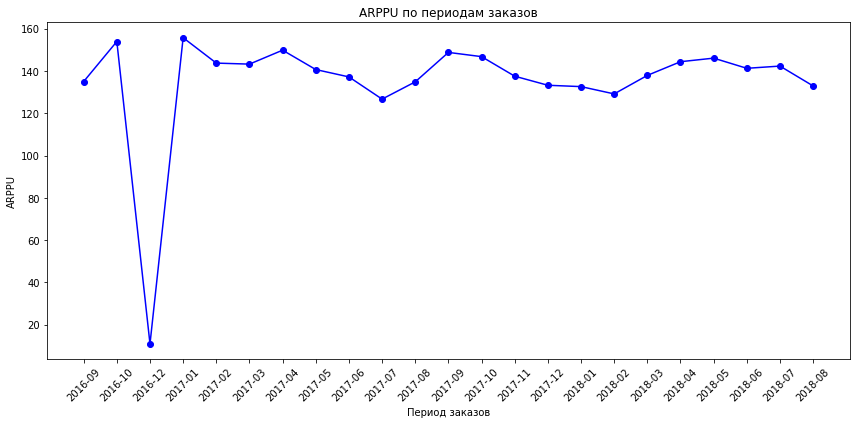

In [101]:
#визуализация ARPPU

plt.figure(figsize=(12, 6))
plt.plot(arppu['order_period'], arppu['arppu'], marker='o', linestyle='-', color='b')


plt.title('ARPPU по периодам заказов')
plt.xlabel('Период заказов')
plt.ylabel('ARPPU')
plt.xticks(rotation=45)  
plt.tight_layout()
plt.show()


ARPPU в стагнации

## Задача 4. Выбрать одну из 3 основных гипотез с помощью фреймворка ICE.

Посмотрев на когортный анализ и метрики, пришли к выводу - нужно изменить продукт. Метрики необходимо срочно повышать. 


Есть 3 гипотезы. По каждой гипотезе показатели по Ease, Confidence уже есть. 
Нужно заполнить самый важный показатель — Impact. 


**Гипотеза 1 -  Если исправим баг в системе процессинга заказов, то клиентам не придётся сталкиваться с проблемой отмены 
заказа,вследствие чего количество доставленных заказов увеличится. Считаем, что мы таким образом избавимся от всех отмен.**

In [118]:
#расчитываем кол-во отмененных заказов с июня 2017 года
сanceled_orders = orders.query('order_status == "canceled" and order_purchase_timestamp >= "2017-06-01 00:00:00"').order_id.count()
сanceled_orders

499

In [124]:
# Определяем Impact 

if сanceled_orders <= 50:
    impact = 1
elif сanceled_orders <= 150:
    impact = 2
elif сanceled_orders <= 350:
    impact = 3
elif сanceled_orders <= 750:
    impact = 4
elif сanceled_orders <= 1550:
    impact = 5
elif сanceled_orders <= 3150:
    impact = 6
elif сanceled_orders <= 6350:
    impact = 7
elif сanceled_orders <= 12750:
    impact = 8
elif сanceled_orders <= 25550:
    impact = 9
else:
    impact = 10
    
impact = impact_1
impact_1

4

In [125]:
impact_1     = 4
confidence_1 = 8
easy_1       = 6

ICE_1 = impact_1 * confidence_1 * easy_1
ICE_1

192

**Гипотеза 2 - Если сократим время до отгрузки заказа, то клиенты перестанут получать свой заказ с запаздыванием, вследствие чего количество заказов увеличится за счёт повторных заказов**

In [126]:
#доставленные с опозданием заказы с июня 2017
late_delivered_orders = orders_copy.query('order_status == "delivered" and order_purchase_timestamp >= "2017-06-01 00:00:00" and order_delivered_customer_date > order_estimated_delivery_date')

In [127]:
#объединим и добавим столбец customer_unique_id
late_delivered_orders = late_delivered_orders.merge(customers_copy[['customer_id', 'customer_unique_id']], on='customer_id')


In [128]:
late_customers = late_delivered_orders.customer_unique_id.nunique() 
late_customers

7245

In [129]:
#конверсия в повторный заказ равна величине медианного retention 1-го месяца (см. пункт 1 проекта).
median_retention = matrix_median
median_retention

0.0035460992907801418

In [130]:
conversion_rate  = round(late_customers * median_retention, 2)
conversion_rate

25.69

In [131]:
# Определяем Impact 

if conversion_rate <= 50:
    impact_2 = 1
elif conversion_rate <= 150:
    impact_2 = 2
elif conversion_rate <= 350:
    impact_2 = 3
elif conversion_rate <= 750:
    impact_2 = 4
elif conversion_rate <= 1550:
    impact_2 = 5
elif conversion_rate <= 3150:
    impact_2 = 6
elif conversion_rate <= 6350:
    impact_2 = 7
elif conversion_rate <= 12750:
    impact_2 = 8
elif conversion_rate <= 25550:
    impact_2 = 9
else:
    impact_2 = 10
    
impact_2

1

In [132]:
confidence_2 = 10
easy_2       = 4

ICE_2 = impact_2 * confidence_2 * easy_2
ICE_2

40

**Гипотеза 3 - Если создадим новый способ оплаты, который будет конвертировать клиентов в повторный заказ, то клиенты не будут испытывать трудности при оформлении заказа, вследствие чего количество заказов увеличится за счёт повторных заказов.**

In [133]:
count_orders = orders_cust_del.query('order_purchase_timestamp >= "2017-06-01 00:00:00"') \
            .groupby('customer_unique_id') \
            .agg({'order_id' : 'nunique'}) \
            .reset_index()     

In [134]:
count_orders = count_orders.groupby('order_id') \
            .agg({'customer_unique_id': 'nunique'}) \
            .rename(columns={'order_id': 'number', 'customer_unique_id': 'count_orders'}) 

count_orders           

,count_orders
order_id,
1,80558
2,2137
3,129
4,23
5,9
6,2
7,3
9,1
15,1


In [135]:
orders_1 = count_orders.query('order_id == 1').count_orders.sum()
replay_orders = orders_1 * median_retention
replay_orders

285.6666666666667

In [136]:
# Определяем Impact 

if replay_orders <= 50:
    impact_3 = 1
elif replay_orders <= 150:
    impact_3 = 2
elif replay_orders <= 350:
    impact_3 = 3
elif replay_orders <= 750:
    impact_3 = 4
elif replay_orders <= 1550:
    impact_3 = 5
elif replay_orders <= 3150:
    impact_3 = 6
elif replay_orders <= 6350:
    impact_3 = 7
elif replay_orders <= 12750:
    impact_3 = 8
elif replay_orders <= 25550:
    impact_3 = 9
else:
    impact_3 = 10
    
impact_3

3

In [137]:
confidence_3 = 5
easy_3       = 9

ICE_3 = impact_3 * confidence_3 * easy_3
ICE_3

135

#### Сравниваем показатели трех гипотез

In [139]:
print(ICE_1, ICE_2, ICE_3)

192 40 135


#### В первую очередь стоит проанализировать гипотезу 1, т.к. самый высокий ICE = 192, затем гипотезу 3 (ICE_3 = 135) 

## 5. Сформулируем нужные метрики, на которые гипотеза 1 должна повлиять.

Гипотеза: Если исправим баг в системе процессинга заказов, то клиентам не придётся сталкиваться с проблемой отмены заказа, вследствие чего количество доставленных заказов увеличится. Считаем, что мы таким образом избавимся от всех отмен

1. Целевая метрика - Количество  доставленных заказов  (должно увеличиться после исправления бага)  


2. Прокси метрика - Конверсия в доставку товара (все доставленные товары/общее кол-во заказов). Цель - снижение числа отмен после исправления бага.


3. Барьерная метрика - Конверсия в оформление заказа - Доля клиентов, которые оформили заказ / на количество активной аудитории
Исправление бага не должно негативно сказываться на общем восприятии клиента совершить следующий заказ.

## 6. Выводы о проделанной работе

Масштабирование продукта не предоставляется возможным в связи с крайне низкой возвращемостью клиентов. Доля повторных заказов очень низка. В связи с этим выручка у стартапа не растет. 
    

**Рекомендации по продукту**:
   
Нужно работать со всеми выбранными метриками. Провести АВ тестирование. Убедиться в наличии проблем в системе процессинга. Проверить гипотезу с добавлением нового способа оплаты. Если стат значимые результаты получаем, то передать данные в отдел разработки. Нужно провести иследование ЦА для понимания их потребности и улучшения продукта (ассортимент, удобство поиска, оформления, оплаты товаров на самом маркетплейсе). Разработать минимально жизнеспособный продукт. Получить обратную связь (насколько клиенты удовлетворены предлагаемой продукцией из Бразилии на маркетплейсе)